x [0.27568048 0.90033111 0.65076443 0.40242156 0.76639317 0.56648834
 0.37158174 0.13884563 0.40679915 0.24357688 0.95906048 0.36324877
 0.37402131 0.20613758 0.65336477 0.22243198 0.75108697 0.61416612
 0.90584382 0.93489218 0.49383815 0.85008259 0.08981782 0.24766799
 0.21422196 0.67471757 0.74073259 0.87801239 0.53894198 0.20596408
 0.40856855 0.3356534  0.70744862 0.62790738 0.44082456 0.21647194
 0.35000092 0.57933227 0.45907683 0.01249099 0.43461464 0.15078263
 0.42534343 0.95812943 0.93252472 0.62617489 0.74385352 0.33097798
 0.86256314 0.70610264]
y [0.11862885 0.06528184 0.6398893  0.30908977 0.7009205  0.08744112
 0.08355204 0.5420659  0.64325551 0.77445882 0.36478132 0.97813973
 0.99895843 0.51160825 0.59043337 0.79889748 0.90036112 0.83637543
 0.07747919 0.86200908 0.15464203 0.96668667 0.268468   0.35022472
 0.78365153 0.88815318 0.72974966 0.73839473 0.08621207 0.37471326
 0.9234939  0.70600639 0.33036644 0.00834403 0.60914611 0.25395124
 0.307141   0.36841947 0.68764975 

<IPython.core.display.Javascript object>


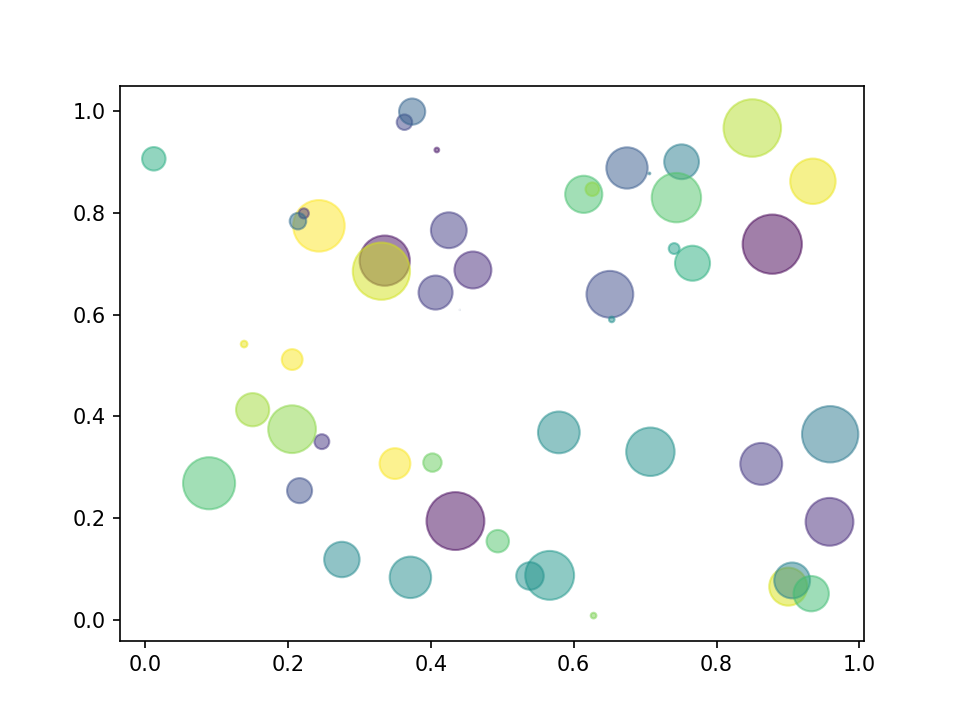

In [11]:
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N) # случайный вектор из 50 элементов
print("x", x)
y = np.random.rand(N) # случайный вектор из 50 элементов
print("y", y)
colors = np.random.rand(N) # случайный вектор из 50 элементов, чтобы задавать цвета каждой из точек
area = (30 * np.random.rand(N))**2 # случайные площади каждой из точек

plt.scatter(x, y, s=area, c=colors, alpha=0.5) # нанесение точек на диаграмму, x и y - координаты
                                               # area - площади точек, colors - цвета точек
                                               # alpha - значение прозрачности точек
plt.show()

In [12]:
%matplotlib notebook

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from scipy.stats import norm

class PiAnimation:
    def __init__(self, ax: Axes, ax_pi: Axes, ax_gaus: Axes):
        self.inner = 0
        self.out = 0

        self.xi, self.yi = [], []
        self.xo, self.yo = [], []

        ax.set_xlim(-1.0, 1.5)
        ax.set_ylim(-1.0, 1.5)
        ax.axis("off")
        ax.add_artist(plt.Circle((0.0, 0.0), 1, fill=False))
        ax.add_artist(plt.Rectangle((-1, -1), 2, 2, fill=False))

        self.line_i = ax.plot(self.xi, self.yi, "ro")[0]
        self.line_o = ax.plot(self.xo, self.yo, "bo")[0]
        self.text = ax.text(0.3, 1.1, "", fontdict={"fontsize": 32})
        self.text_n = ax.text(-0.9, 1.1, "", fontdict={"fontsize": 32})

        self.ax_pi = ax_pi
        self.pi = []
        self.pi_line = ax_pi.plot([], self.pi,"-")[0]
        ax_pi.set_ylim(0, 2*np.pi)

        self.ax_gaus = ax_gaus
        self.gauss_point = np.linspace(0.5*np.pi, 1.5 * np.pi, 200)
        self.gauss = ax_gaus.plot(self.gauss_point, np.zeros(200), "")[0]

    def __call__(self, n):
        x, y = 2*(np.random.random_sample(2) - 0.5)
        if x ** 2 + y ** 2 <= 1:
            self.inner += 1
            self.xi.append(x)
            self.yi.append(y)
            self.line_i.set_data(self.xi, self.yi)
        else:
            self.out +=1
            self.xo.append(x)
            self.yo.append(y)
            self.line_o.set_data(self.xo, self.yo)
        N = self.inner + self.out
        prob = self.inner/N
        pi = 4*prob
        self.pi.append(pi)
        self.text.set_text(r"$\pi = {:.5}$".format(pi))
        self.text_n.set_text("N = {:5d}   ".format(N))

        self.pi_line.set_data(range(N), self.pi)
        self.ax_pi.relim()
        self.ax_pi.autoscale()

        mean, var = np.mean(self.pi), np.var(self.pi)

        if N > 3:
            self.gauss.set_data(self.gauss_point, norm.pdf(self.gauss_point, loc = mean, scale = var))
            self.ax_gaus.relim()
            self.ax_gaus.autoscale()
        return self.line_i, self.line_o, self.text, self.text_n, self.pi_line, self.gauss

<IPython.core.display.Javascript object>


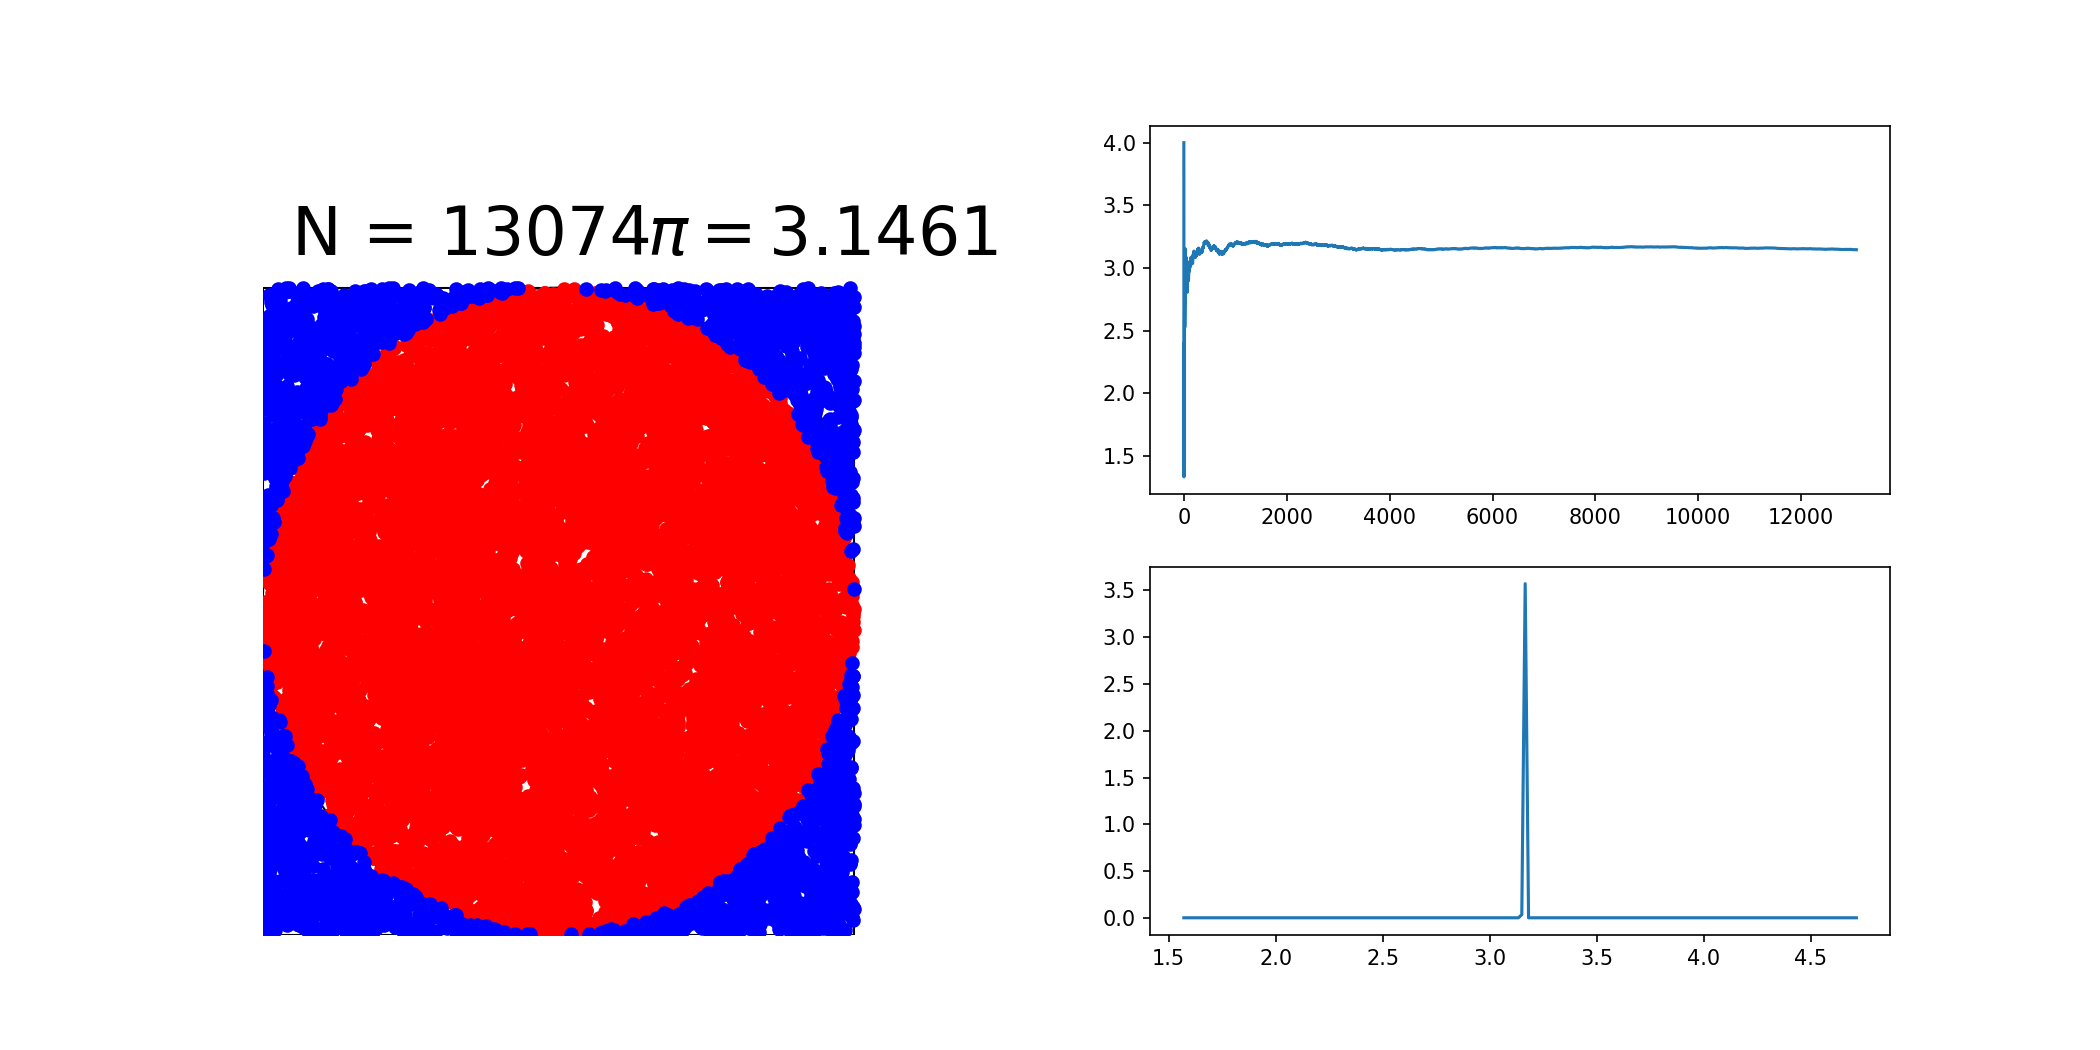

In [14]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(14,7))

ax1 = plt.subplot(121)
ax2 = plt.subplot(222)
ax3 = plt.subplot(224)
pi_ani = PiAnimation(ax1, ax2, ax3)
anim = FuncAnimation(fig, pi_ani, frames=10_000, interval=50, blit=True)
plt.show()